In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualizations
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams.update({'figure.max_open_warning': 0})  # Avoid warnings for too many figures


In [18]:
# Paths to the data produced in Notebook 2
id_degree_dist_path = './../../data/analysis/id_degree_distribution.csv'
vat_degree_dist_path = './../../data/analysis/vat_degree_distribution.csv'

# Load the degree distribution data
id_degree_dist = pd.read_csv(id_degree_dist_path)
vat_degree_dist = pd.read_csv(vat_degree_dist_path)
id_degree_dist.head()

,time_window,ID,ID_degree,log_ID_degree
0,0,215,3,0.477121
1,0,330,8,0.903090
2,0,397,2,0.301030
3,0,413,22,1.342423
4,0,488,1,0.000000


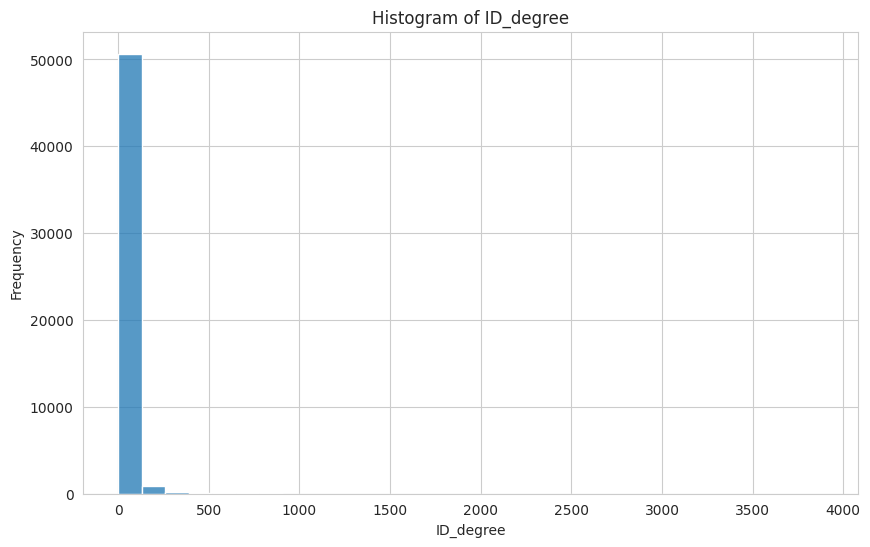

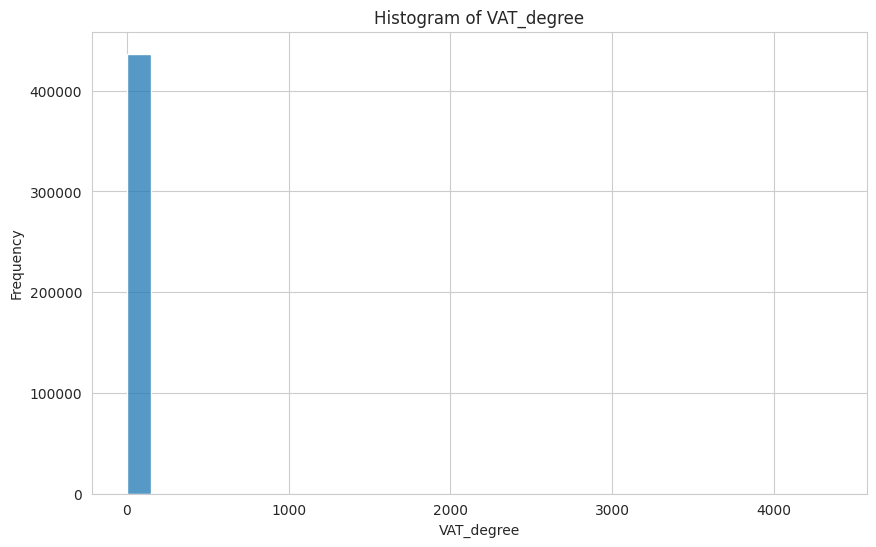

In [19]:
def plot_histograms(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=False, bins=30)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

# Call the function for each degree type
plot_histograms(id_degree_dist, 'ID_degree')
plot_histograms(vat_degree_dist, 'VAT_degree')


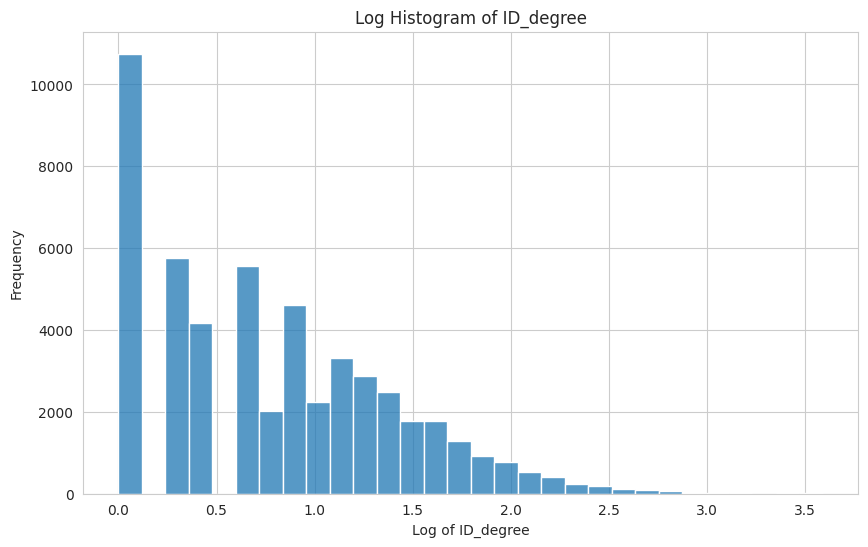

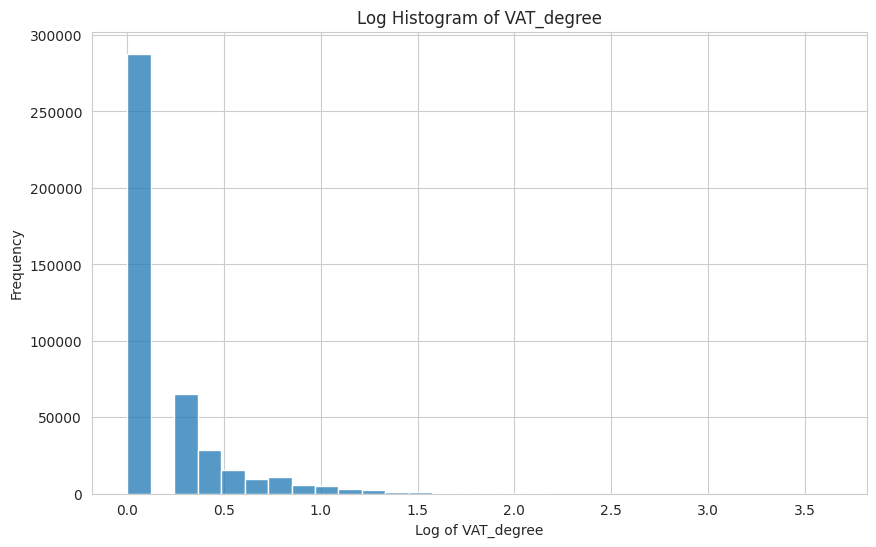

In [25]:

# Function to plot logarithmic histograms
def plot_log_histograms(df, column):
    df = df[df[column] > 0]  # Remove zeros to avoid -inf values in log
    plt.figure(figsize=(10, 6))
    sns.histplot(np.log10(df[column]), kde=False, bins=30)
    plt.xlabel('Log of ' + column)
    plt.ylabel('Frequency')
    plt.title(f'Log Histogram of {column}')
    plt.show()

# Call the function for each degree type
plot_log_histograms(id_degree_dist, 'ID_degree')
plot_log_histograms(vat_degree_dist, 'VAT_degree')


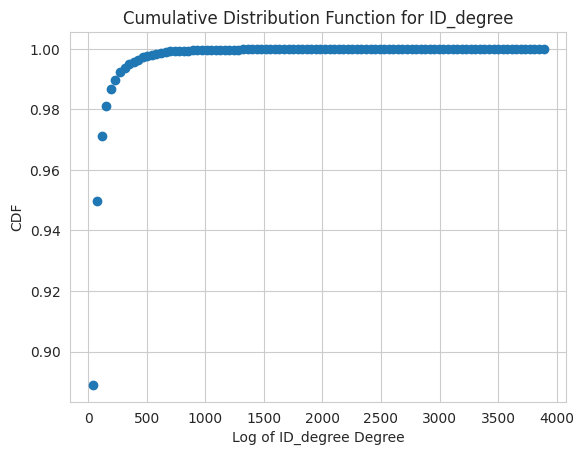

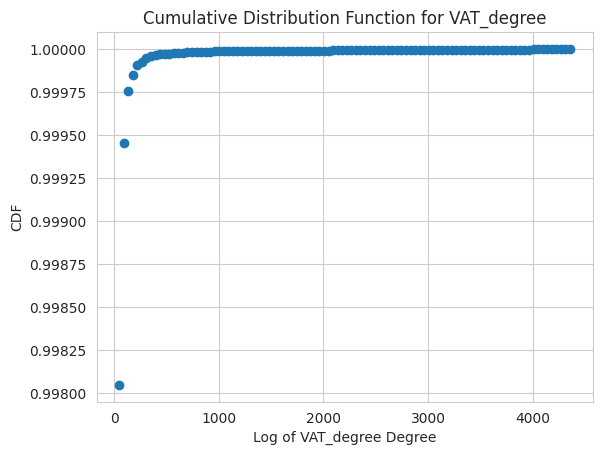

In [22]:
from numpy import histogram
import numpy as np

def plot_cdf(df, degree_col):
    count_data, bin_edges = histogram(df[degree_col], bins=100)
    cdf = np.cumsum(count_data)
    plt.plot(bin_edges[1:], cdf/cdf[-1], marker='o', linestyle='none')
    plt.xlabel(f'Log of {degree_col} Degree')
    plt.ylabel('CDF')
    plt.title(f'Cumulative Distribution Function for {degree_col}')
    plt.show()

# Call the function for each degree type
plot_cdf(id_degree_dist, 'ID_degree')
plot_cdf(vat_degree_dist, 'VAT_degree')


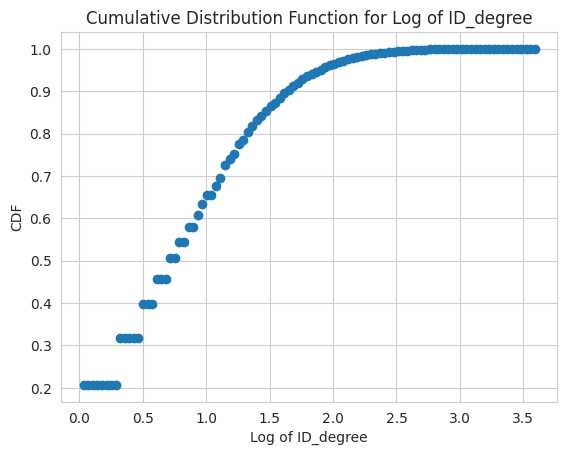

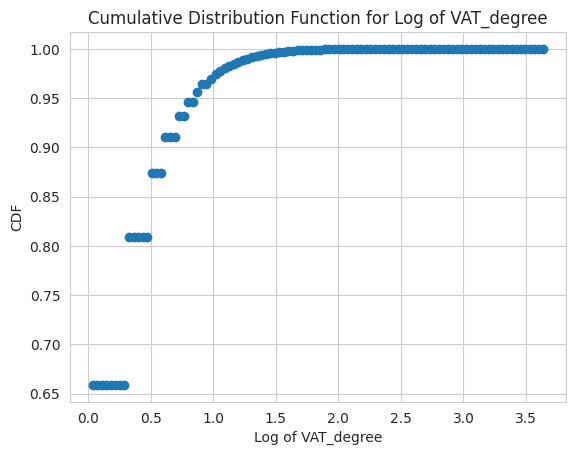

In [26]:

# Function to plot CDF with logarithmic scale
def plot_log_cdf(df, degree_col):
    df = df[df[degree_col] > 0]  # Remove zeros to avoid -inf values in log
    count_data, bin_edges = np.histogram(np.log10(df[degree_col]), bins=100)
    cdf = np.cumsum(count_data)
    plt.plot(bin_edges[1:], cdf/cdf[-1], marker='o', linestyle='none')
    plt.xlabel('Log of ' + degree_col)
    plt.ylabel('CDF')
    plt.title(f'Cumulative Distribution Function for Log of {degree_col}')
    plt.show()

# Call the function for each degree type
plot_log_cdf(id_degree_dist, 'ID_degree')
plot_log_cdf(vat_degree_dist, 'VAT_degree')


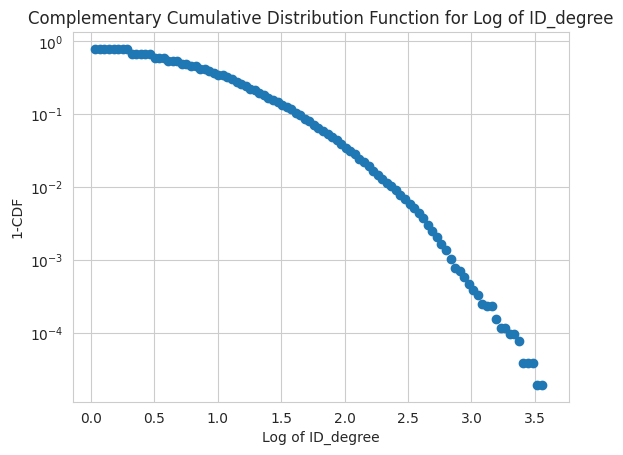

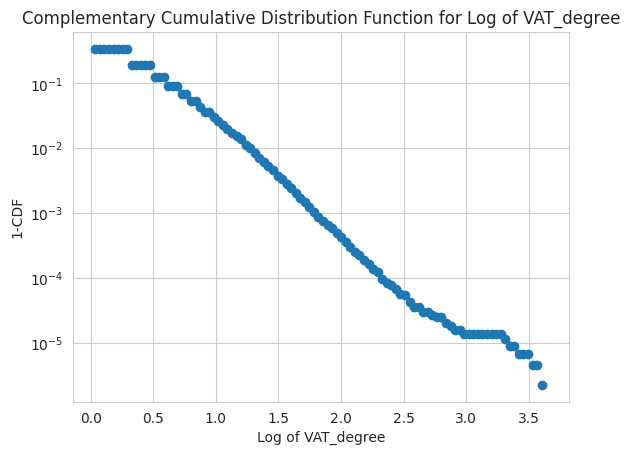

In [27]:

# Function to plot Complementary CDF with logarithmic scale
def plot_complementary_log_cdf(df, degree_col):
    df = df[df[degree_col] > 0]  # Remove zeros to avoid -inf values in log
    count_data, bin_edges = np.histogram(np.log10(df[degree_col]), bins=100)
    cdf = np.cumsum(count_data)
    complementary_cdf = 1 - cdf/cdf[-1]
    plt.plot(bin_edges[1:], complementary_cdf, marker='o', linestyle='none')
    plt.xlabel('Log of ' + degree_col)
    plt.ylabel('1-CDF')
    plt.title(f'Complementary Cumulative Distribution Function for Log of {degree_col}')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.show()

# Call the function for each degree type
plot_complementary_log_cdf(id_degree_dist, 'ID_degree')
plot_complementary_log_cdf(vat_degree_dist, 'VAT_degree')

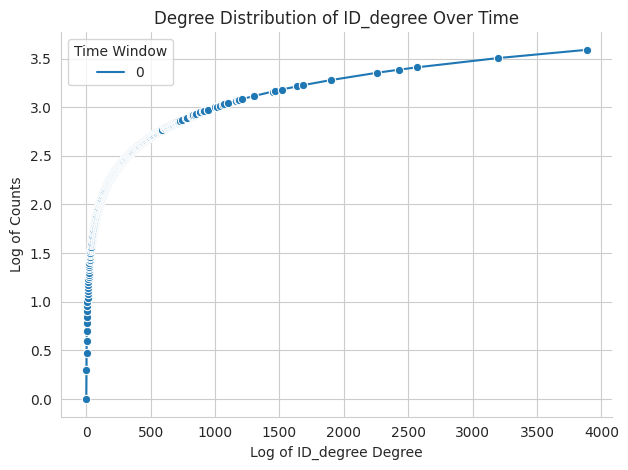

In [28]:
def plot_degree_distribution(df, column):
    # plt.figure(figsize=(12, 8))
    sns.lineplot(data=df, x=column, y='log_'+column, hue='time_window', marker='o')
    plt.xlabel(f'Log of {column} Degree')
    plt.ylabel('Log of Counts')
    plt.title(f'Degree Distribution of {column} Over Time')
    plt.legend(title='Time Window')
    sns.despine()  # Remove the top and right spines from plot
    plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
    plt.show()

# Call the function for each degree type
plot_degree_distribution(id_degree_dist, 'ID_degree')
plot_degree_distribution(vat_degree_dist, 'VAT_degree')


In [ ]:
def save_plot(df, column, filename):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(data=df, x=column, y='log_counts', hue='time_window', marker='o', ax=ax)
    ax.set_xlabel(f'Log of {column} Degree')
    ax.set_ylabel('Log of Counts')
    ax.set_title(f'Degree Distribution of {column} Over Time')
    ax.legend(title='Time Window')
    sns.despine()
    plt.tight_layout()
    fig.savefig(f'./../../figures/{filename}.png', dpi=300)

# Save plots to disk
save_plot(id_degree_dist, 'ID_degree', 'id_degree_distribution')
save_plot(vat_degree_dist, 'VAT_degree', 'vat_degree_distribution')


NameError: name 'id_degree_dist' is not defined